In [58]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

# Random numbers

## Challenge

1) Python has many built-in random number generators. Check-out the documentation and try a couple of ones. In particular, compare the output of the built-in expontential and Gaussian generators with the versions implemented above.

2) Another popular method to generate numbers according to the Gaussian distribution is known as the Box–Muller algorithm. Look up its definition on the web, try to implement it and verify that it works as expected.

## Challenge 1

Nous avons trouver des métode pour créer des distribution normal et exponentielle sur ce sit web: https://docs.scipy.org/doc/numpy/reference/routines.random.html

Nous utilisons numpy.random.exponential et numpy.random.normal

### Comparaison distribution exponentielle

Text(0.5,1,'numpy.random.exponential')

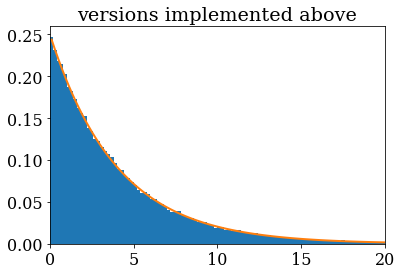

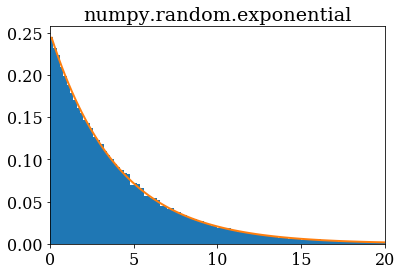

In [78]:
N = 100000
alpha = 0.25 # rate of the exponential distribution
x = numpy.random.random_sample(N)
y = -1/alpha*numpy.log(1-x)
Sample_exp = numpy.random.exponential(1/alpha,N)

# Plots
binwidth=0.2
pyplot.xlim(0,20)
bins=numpy.arange(0.,21., binwidth)
"versions implemented above"
pyplot.hist(y,bins,normed=True);
# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2)
pyplot.title("versions implemented above")
pyplot.figure()

'versions with numpy.random.exponential'
pyplot.hist(Sample_exp,bins,normed=True);
# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2)
pyplot.xlim(0,20)
pyplot.title("numpy.random.exponential")

On voit que la distribution nous donne bien une distribution exponentielle et qu'elle est quasi identique a la distribution du cours.

### Comparaison distribution normal

Size of accepted set h and expected size 1/K: 71199 71428.57142857143


Text(0.5,1,'numpy.random.normal')

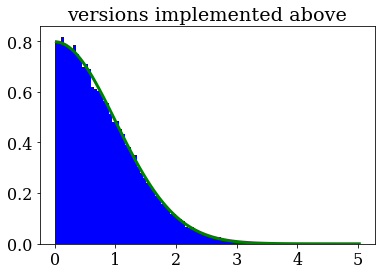

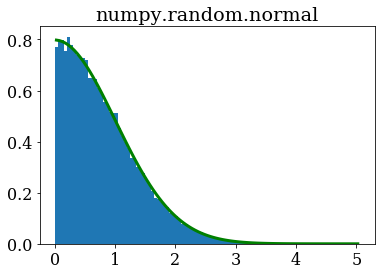

In [79]:
"versions implemented above"
# Number of random numbers to draw according to p1 
N = 100000
K = 1.4

mean = 0
std = 1

# Empty list for the final set of numbers
h=[]

for i in range(N):
    u1 = numpy.random.random_sample()
    
    # Distribute g according to the exponential distribution
    g = numpy.log(1/(1-u1))
    
    # Generate a second number for the acceptance/rejection condition
    u2 = numpy.random.random_sample()
    
    # Acceptance/rejection step
    ratio = 2*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi) / \
                (K*numpy.exp(-g))
    if (u2<ratio):
        # Append g to the set h
        h.append(g)

# Size of the accepted set
print("Size of accepted set h and expected size 1/K:", len(h), N/K)

# Plots
binwidth=0.05
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(h,bins=numpy.arange(0.,5., binwidth),normed=True,color='blue');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')
pyplot.title("versions implemented above")
pyplot.figure()

"---------"
'versions with numpy.random.normal'



Sample_normal = numpy.random.normal(mean,std,N)

pyplot.hist(Sample_normal,bins,normed=True);
# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')
pyplot.title("numpy.random.normal")

On voit que la distribution nous donne bien une distribution normal et qu'elle est quasi identique a la distribution du cours.

## Challenge 2


Implémentation de l'algorithm de Box–Muller trouver sur ce sit web: https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Box-Muller

In [61]:
u0 = numpy.random.random_sample(N)
u1 = numpy.random.random_sample(N)

In [62]:
z0 = ((-2*numpy.log(u0))**(1/2))*numpy.cos(2*numpy.pi*u1)

In [63]:
z1 = ((-2*numpy.log(u0))**(1/2))*numpy.sin(2*numpy.pi*u1)

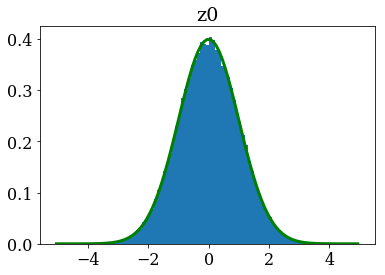

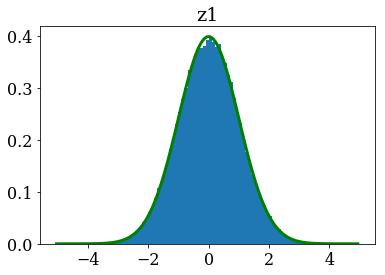

In [72]:
binwidth=0.1
bins=numpy.arange(-5.1,5.1, binwidth)

pyplot.hist(z1,bins,normed=True);

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,(2*numpy.pi)**-0.5 * numpy.exp(-0.5*xc**2),lw=3,color='green')
pyplot.title("z0")

pyplot.figure()
pyplot.title("z1")
pyplot.hist(z0,bins,normed=True);
pyplot.plot(xc,(2*numpy.pi)**-0.5 * numpy.exp(-0.5*xc**2),lw=3,color='green')

Nous pouvons voire grâce au fitting que nous trouvons une distribution normal comme attendu.